<a href="https://www.kaggle.com/code/tarakenny/fitbit-sample-vs-aha-guideline-analysis?scriptVersionId=229889177" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
title: "Bella Analysis"
author: "Tara Kenny"
date: "2025-26-03"
output: pdf_document
---

In [24]:
knitr::opts_chunk$set(echo = TRUE, warning = FALSE, message = FALSE)


## Introduction to BellaBeat and Analysis Opportunity
BellaBeat is a high-tech manufacturer of health-focused products for women. BellaBeat intends to become a larger player in the  global smart device market. 
Urška Sršen: BellaBeat’s cofounder and Chief Creative Officer has asked me to analyze smart device usage data in order to gain insight into how people are already using their smart devices. She would like a high-level recommendations for how these trends can inform BellaBeat marketing strategy.  

## Sample Overview
Ms. Sršen has asked me to focus on specific fitness tracker Data available on Kaggle - "FitBit Fitness Tracker Data" (CC0: Public Domain, dataset made available through Mobius).

The data is organized as a zip file dataset made up of 20 files, zipped into 2 folders: 

 * 	data collected from March 12, 2016 through April 11, 2016 and 
 * 	data collected from April 12, 2016 through May 12, 2016.
 
Most data is in long data format – each field in first column is repeated to show different times for each ID and characteristics collected for that field.  Each row represents either a day, minute or hour observation for each athlete, Each subject can be represented by multiple rows.

It's important to note this is a very small sample so not considered reliable.   It is comprised of data collected from 35 fitbit users over less than 2 months.  Worldwide fitbit user population size is 38M (Statista Fitbit monthly active users 2012-2023, Published by Federica Laricchia, Jun 7, 2024).  To achieve a target 95% confidence level with a 5% margin of error, we would need a sample size of 385 users.  As it stands, our sample size of 35 implies a margin of error of about 18% at 95% confidence level.  Margin of error is a tolerable degree of deviation from a correct or exact value or target.
The data also did not include sex, age, weight loss or muscle mass for each athlete. 

But what I found most valuable was data pertaining to minutes exercised at different intensity levels.   


## Targeted Deliverable

The most consistent data available across the samples were minutes at different intensity levels of exercise.  I leveraged this data to determine how well our sample is meeting ADA guidelines for weekly exercise overall.  
The American Heart Association(AHA) suggests getting at least 150 minutes per week of moderate-intensity aerobic activity or 75 minutes per week of vigourous aerobic activity.  
(https://www.heart.org/en/healthy-living/fitness/fitness-basics/aha-recs-for-physical-activity-in-adults)
(https://www.cdc.gov/physical-activity-basics/guidelines/adults.html#)

I also used the heartrate and METs information available in the data to compare to AHA targets for each at similar intensities (https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates)

I have made all the R code visible in this document to make the logic to the findings transparent.

## Data Processing - merging and cleanup of data

In [25]:
install.packages("tidyverse", repos = "http://cran.us.r-project.org")
library(tidyverse)
install.packages("dplyr", repos = "http://cran.us.r-project.org")
library(dplyr)
install.packages("lubridate", repos = "http://cran.us.r-project.org")
library(hms)
install.packages("readr", repos = "http://cran.us.r-project.org")
library(readr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



I did some standard cleanup of data by: 

 * merging the March files with the corresponding April files, 
 * removing duplicate rows that overlapped from each file, 
 * turning a date-time character string into actual Date/Time field types for analysis (some files only included Date),
 * adding days of the week and weeks of the year which is helpful in analysis, 
 *checking for duplicate rows based based on simple primary keys (like Id, Time, Date)
 * normalizing calories, METs and HR averages per minute as it appeared they were being measured differently from dailyAcitivity metrics and minuteActivity metrics.

dailyActivity cleanup (including cleanup merging of rows with duplicate primary keys for when user entered more than 1x a day - hence the comment that pops up 'Daily Activity Needs more work, which was recified) - 

In [26]:
bind <- rbind(read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv", show_col_types = FALSE), read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv", show_col_types = FALSE))
bind = rename(bind, Date = ActivityDate)
bind = distinct(bind)
dateClean <- bind  %>%
  mutate(Date = mdy(Date)) 
dateClean$day_of_week <- weekdays(dateClean$Date)
dateClean$week_of_year <- week(dateClean$Date)
dailyActivity <- dateClean
notunique <- dateClean %>% 
  add_count(Id, Date) %>% 
  filter(n > 1)
if(nrow(notunique) == 0){
  glimpse(dailyActivity)
} else if (nrow(notunique) > 0) {
    print("dailyActivity needs more work")
}
dailyActivityClean <- dailyActivity %>%
  group_by(Id, Date, day_of_week, week_of_year)  %>%
  summarise(
    TotalSteps = sum(TotalSteps),
    TotalDistance  = sum(TotalDistance),  
    TrackerDistance =sum(TrackerDistance),     
    LoggedActivitiesDistance = sum(LoggedActivitiesDistance),
    VeryActiveDistance = sum(VeryActiveDistance),
    ModeratelyActiveDistance = sum(ModeratelyActiveDistance),
    LightActiveDistance   = sum(LightActiveDistance),
    SedentaryActiveDistance = sum(SedentaryActiveDistance), 
    VeryActiveMinutes  = sum(VeryActiveMinutes),
    FairlyActiveMinutes  = sum(FairlyActiveMinutes),
    LightlyActiveMinutes  = sum(LightlyActiveMinutes),
    SedentaryMinutes    = sum(SedentaryMinutes),
    Calories   = sum(Calories) , 
    .groups = 'drop'
      )
print("Resolved")
glimpse(dailyActivityClean) 

[1] "dailyActivity needs more work"
[1] "Resolved"
Rows: 1,373
Columns: 17
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ Date                     <date> 2016-03-25, 2016-03-26, 2016-03-27, 2016-03-…
$ day_of_week              <chr> "Friday", "Saturday", "Sunday", "Monday", "Tu…
$ week_of_year             <dbl> 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 1…
$ TotalSteps               <dbl> 11004, 17609, 12736, 13231, 12041, 10970, 122…
$ TotalDistance            <dbl> 7.11, 11.55, 8.53, 8.93, 7.85, 7.16, 7.86, 7.…
$ TrackerDistance          <dbl> 7.11, 11.55, 8.53, 8.93, 7.85, 7.16, 7.86, 7.…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 2.57, 6.92, 4.66, 3.19, 2.16, 2.36, 2.29, 3.3…
$ ModeratelyActiveDistance <dbl> 0.46, 0.73, 0.16, 0.79, 1.09, 0.51, 0.49, 0.8…
$ LightActiveDistance      <dbl> 4.07, 3.91, 3.71, 4.95, 4.61, 4.29, 5.04, 3.6…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 

Cleaning the hourly data -

In [27]:
bind <- rbind(read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv", show_col_types = FALSE), read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv", show_col_types = FALSE))
bind = rename(bind, Date_Time = ActivityHour)
bind=distinct(bind)
clean <- bind %>%
  mutate(Date_Time = mdy_hms(Date_Time),
         Date = as.Date(Date_Time),
         Time = as_hms(Date_Time)) 
hourlyCalories <- clean
notunique <- clean %>% 
  add_count(Id, Date, Time) %>% 
  filter(n > 1)
if(nrow(notunique) == 0){
  print("hourlyCalories Results")
  glimpse(hourlyCalories) 
} else if (nrow(notunique) > 0) {
  print("hourlyCalories needs more work")
}


bind <- rbind(read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv", show_col_types = FALSE), read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv", show_col_types = FALSE))
bind = rename(bind, Date_Time = ActivityHour)
bind = distinct(bind)
clean <- bind %>%
  mutate(Date_Time = mdy_hms(Date_Time),
         Date = as.Date(Date_Time),
         Time = as_hms(Date_Time)) 
hourlyIntensities <- clean
notunique <- clean %>% 
  add_count(Id, Date, Time) %>% 
  filter(n > 1)
if(nrow(notunique) == 0){
  print("hourlyIntensities Results")
  glimpse(hourlyIntensities) 
} else if (nrow(notunique) > 0) {
  print("hourlyIntensities needs more work")
}


bind <- rbind(read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv", show_col_types = FALSE), read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv", show_col_types = FALSE))
bind = rename(bind, Date_Time = ActivityHour)
bind = distinct(bind)
clean <- bind %>%
  mutate(Date_Time = mdy_hms(Date_Time),
         Date = as.Date(Date_Time),
         Time = as_hms(Date_Time)) 
hourlySteps <- clean
notunique <- clean %>% 
  add_count(Id, Date, Time) %>% 
  filter(n > 1)
if(nrow(notunique) == 0){
  print("hourlySteps results")
  glimpse(hourlySteps) 
} else if (nrow(notunique) > 0) {
  print("hourlySteps needs more work")
}
hourlyStats <- merge(merge(hourlyCalories, hourlyIntensities, by.x=c("Id", "Date", "Time", "Date_Time"), by.y=c("Id", "Date", "Time", "Date_Time"), all= TRUE), hourlySteps, by.x=c("Id", "Date", "Time", "Date_Time"), by.y=c("Id", "Date", "Time", "Date_Time"), all= TRUE) 
print("hourStats cleaned and merged results")
  glimpse(hourlyStats)

[1] "hourlyCalories Results"
Rows: 46,008
Columns: 5
$ Id        <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, …
$ Date_Time <dttm> 2016-03-12 00:00:00, 2016-03-12 01:00:00, 2016-03-12 02:00:…
$ Calories  <dbl> 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 89, 134, 130, 81, 25…
$ Date      <date> 2016-03-12, 2016-03-12, 2016-03-12, 2016-03-12, 2016-03-12,…
$ Time      <time> 00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00,…
[1] "hourlyIntensities Results"
Rows: 46,008
Columns: 6
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ Date_Time        <dttm> 2016-03-12 00:00:00, 2016-03-12 01:00:00, 2016-03-12…
$ TotalIntensity   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 26, 49, 47, 20, 121, 12…
$ AverageIntensity <dbl> 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.0…
$ Date             <date> 2016-03-12, 2016-03-12, 2016-03-12, 2016-03-12, 2016…
$ Time             <time> 00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05…
[1] "hourly

Cleaning the minute data -

In [28]:
bind <- rbind(read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv", show_col_types = FALSE), read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv", show_col_types = FALSE))
bind = rename(bind, Date_Time = ActivityMinute)
bind = distinct(bind)
clean <- bind %>%
  mutate(Date_Time = mdy_hms(Date_Time),
         Date = as.Date(Date_Time),
         Time = as_hms(Date_Time)) %>%
         select (-Date_Time)
minuteCalories <- clean
notunique <- clean %>% 
  add_count(Id, Date, Time) %>% 
  filter(n > 1)
if(nrow(notunique) == 0){
  print("minuteCalories results")
  glimpse(minuteCalories)
  } else if (nrow(notunique) > 0) {
  print("minuteCalories needs more work")
}

bind <- rbind(read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv", show_col_types = FALSE),read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv", show_col_types = FALSE) )
bind = rename(bind, Date_Time = ActivityMinute)
bind = distinct(bind)
clean <- bind %>%
  mutate(Date_Time = mdy_hms(Date_Time),
         Date = as.Date(Date_Time),
         Time = as_hms(Date_Time)) %>%
         select (-Date_Time)
minuteIntensities <- clean
notunique <- clean %>% 
  add_count(Id, Date, Time) %>% 
  filter(n > 1)
if(nrow(notunique) == 0){
  print("minuteIntensities results")
  glimpse(minuteIntensities) 
} else if (nrow(notunique) > 0) {
  print("minuteIntensities needs more work")
}

bind <- rbind(read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv", show_col_types = FALSE), read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv", show_col_types = FALSE))
bind = rename(bind, Date_Time = ActivityMinute)
bind = distinct(bind)
clean <- bind %>%
  mutate(Date_Time = mdy_hms(Date_Time),
         Date = as.Date(Date_Time),
         Time = as_hms(Date_Time)) %>%
         select (-Date_Time)
minuteSteps <- clean
notunique <- clean %>% 
  add_count(Id, Date, Time) %>% 
  filter(n > 1)
if(nrow(notunique) == 0){
  print("minuteSteps results")
  glimpse(minuteSteps) 
} else if (nrow(notunique) > 0) {
  print("minuteSteps needs more work")
}
minuteStats <- merge(merge(minuteCalories, minuteIntensities, all = TRUE), minuteSteps, all = TRUE)

[1] "minuteCalories results"
Rows: 2,760,120
Columns: 4
$ Id       <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ Calories <dbl> 0.7973, 0.7973, 0.7973, 0.7973, 0.7973, 0.7973, 0.7973, 0.797…
$ Date     <date> 2016-03-12, 2016-03-12, 2016-03-12, 2016-03-12, 2016-03-12, …
$ Time     <time> 00:00:00, 00:01:00, 00:02:00, 00:03:00, 00:04:00, 00:05:00, …
[1] "minuteIntensities results"
Rows: 2,760,120
Columns: 4
$ Id        <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, …
$ Intensity <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Date      <date> 2016-03-12, 2016-03-12, 2016-03-12, 2016-03-12, 2016-03-12,…
$ Time      <time> 00:00:00, 00:01:00, 00:02:00, 00:03:00, 00:04:00, 00:05:00,…
[1] "minuteSteps results"
Rows: 2,760,120
Columns: 4
$ Id    <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503…
$ Steps <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Date  <date> 2016-03-12, 2016-

MinuteMETs required some special handling because of 2 bad data rows in the merged data.  NA results were inserted into METs field during a data conversion.  I used those NAs to filter out the bad data rows.

In [29]:
bind <- rbind(read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv", show_col_types = FALSE), "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv", show_col_types = FALSE)
bind = rename(bind, Date_Time = ActivityMinute)
bind = distinct(bind)
bind$METs = as.integer(bind$METs)
bind = filter(bind,!is.na(bind$METs))
clean <- bind %>%
  mutate(Date_Time = mdy_hms(Date_Time),
         Date = as.Date(Date_Time),
         Time = as_hms(Date_Time)) 
minuteMets <- clean
notunique <- clean %>% 
  add_count(Id, Date, Time) %>% 
  filter(n > 1)
if(nrow(notunique) == 0){
   print("minuteMets results")
  glimpse(minuteMets) 
} else if (nrow(notunique) > 0) {
  print("minuteMets needs more work")
}

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] "minuteMets results"
Rows: 1,445,040
Columns: 5
$ Id        <chr> "1503960366", "1503960366", "1503960366", "1503960366", "150…
$ Date_Time <dttm> 2016-03-12 00:00:00, 2016-03-12 00:01:00, 2016-03-12 00:02:…
$ METs      <int> 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, …
$ Date      <date> 2016-03-12, 2016-03-12, 2016-03-12, 2016-03-12, 2016-03-12,…
$ Time      <time> 00:00:00, 00:01:00, 00:02:00, 00:03:00, 00:04:00, 00:05:00,…


HeartRate data came in seconds so I cleaned the data and converted it to minutes using a mean.

In [30]:
bind <- rbind(read_csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv", show_col_types = FALSE),read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv", show_col_types = FALSE) )
bind = rename(bind, Date_Time = Time)
bind = distinct(bind)

clean <- bind %>%
  mutate( Date_Time = mdy_hms(Date_Time),
          Date = as.Date(Date_Time),
          Time = as_hms(Date_Time), 
          TimeInMinutes = as_hms(floor_date(Date_Time, "minute")) )
secondsHeartRate <- clean
notunique <- clean %>% 
  add_count(Id, Date, Time) %>% 
  filter(n > 1)
if(nrow(notunique) == 0){
  print("secondsHearRate results")
  glimpse(secondsHeartRate) 
} else if (nrow(notunique) > 0) {
  print("secondsHeartRate needs more work")
}
minuteHeartRate <- secondsHeartRate %>%
group_by(Id, Date, TimeInMinutes)  %>%
  summarise(
    avgMinuteHeartRate = round(mean(Value), digits=2), .groups = 'drop'
      )
minuteHeartRate = rename(minuteHeartRate, Time = TimeInMinutes)
glimpse(minuteHeartRate)

[1] "secondsHearRate results"
Rows: 3,614,915
Columns: 6
$ Id            <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 20224844…
$ Date_Time     <dttm> 2016-04-01 07:54:00, 2016-04-01 07:54:05, 2016-04-01 07…
$ Value         <dbl> 93, 91, 96, 98, 100, 101, 104, 105, 102, 106, 109, 112, …
$ Date          <date> 2016-04-01, 2016-04-01, 2016-04-01, 2016-04-01, 2016-04…
$ Time          <time> 07:54:00, 07:54:05, 07:54:10, 07:54:15, 07:54:20, 07:54…
$ TimeInMinutes <time> 07:54:00, 07:54:00, 07:54:00, 07:54:00, 07:54:00, 07:54…
Rows: 471,810
Columns: 4
$ Id                 <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 202…
$ Date               <date> 2016-04-01, 2016-04-01, 2016-04-01, 2016-04-01, 20…
$ Time               <time> 07:54:00, 07:55:00, 07:56:00, 07:57:00, 07:58:00, …
$ avgMinuteHeartRate <dbl> 99.60, 110.11, 92.56, 90.40, 97.88, 107.62, 106.33,…


Normalizing the cleaned data -

In [31]:
minuteStats <- merge(x=minuteStats, y= minuteMets[ , c("Id", "Date", "Time","METs")], all=TRUE)
minuteStats <- merge(x=minuteStats, y= minuteHeartRate[ , c("Id", "Date", "Time", "avgMinuteHeartRate")], all=TRUE)
perMinuteNorms <- minuteStats %>%
  group_by(Intensity) %>%
  summarise(
    AvgCalories = round(mean(Calories)),
    avgMETs = round(mean(METs,na.rm=TRUE))/10,
    avgHeartrate = round(mean(avgMinuteHeartRate, na.rm=TRUE))
     )
perMinuteNorms <- perMinuteNorms %>%
        drop_na() 
perMinuteNorms$METsTgt <- c("< 1.5", "< 3", "3-5.9", "> 6")
perMinuteNorms$HRTgt <- c("60-100 Beats Per Min", "50-60% Max HR", "60-70% Max HR", "70-85% Max HR")
perMinuteNorms <- perMinuteNorms %>%
  relocate(METsTgt, .after = avgMETs)

  
caloriesmultiplierSed = perMinuteNorms$AvgCalories 
dailyActivityClean[, "SedCalsNormd"] <- round(caloriesmultiplierSed[1] * dailyActivityClean$SedentaryMinutes)
dailyActivityClean[, "LightlyCalsNormalized"] <- round(caloriesmultiplierSed[2] * dailyActivityClean$LightlyActiveMinutes)
dailyActivityClean[, "FairlyCalsNormalized"] <- round(caloriesmultiplierSed[3] * dailyActivityClean$FairlyActiveMinutes)
dailyActivityClean[, "VeryCalsNormalized"] <- round(caloriesmultiplierSed[4] * dailyActivityClean$VeryActiveMinutes)


knitr::kable(perMinuteNorms, format="pipe", align ="c", caption="Sample METs and HR averages vs American Heart Association Targets")



Table: Sample METs and HR averages vs American Heart Association Targets

| Intensity | AvgCalories | avgMETs | METsTgt | avgHeartrate |        HRTgt         |
|:---------:|:-----------:|:-------:|:-------:|:------------:|:--------------------:|
|     0     |      1      |   1.0   |  < 1.5  |      68      | 60-100 Beats Per Min |
|     1     |      3      |   3.2   |   < 3   |      86      |    50-60% Max HR     |
|     2     |      5      |   4.9   |  3-5.9  |     102      |    60-70% Max HR     |
|     3     |      9      |   7.9   |   > 6   |     120      |    70-85% Max HR     |

This visual shows how our 35 athlete's average for METs and heartrate meet targets set by the AHA.  Max HR is 220-Age.   Age wasn't available for each of the athletes so I just included an indicator.

## Analysis

Calculate ADA Compliance to minutes and graph individual trends over time, showing who is meeting ADA guidelines and how often.   I also filtered out the very early weeks where there were few participants.

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Saving 12.5 x 6.67 in image
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_bar()`).”


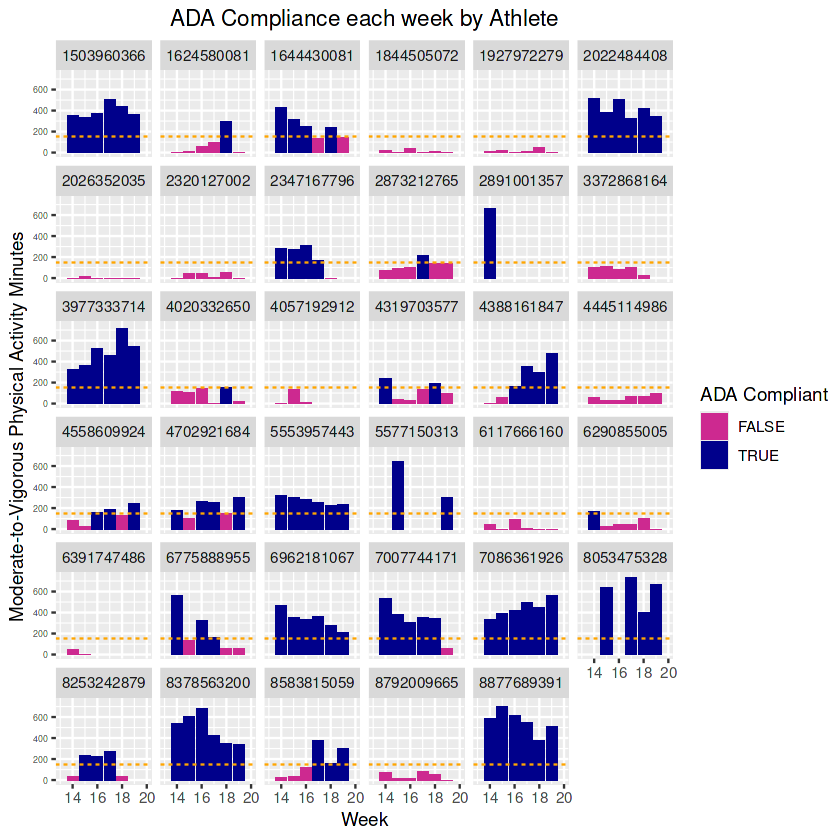

In [32]:
weekly_data <- dailyActivityClean %>%
  mutate(mvpa_minutes = VeryActiveMinutes + FairlyActiveMinutes) %>%
  group_by(Id, week_of_year) %>%
  summarise(total_mvpa_minutes = sum(mvpa_minutes), .groups = 'drop')
  
weekly_data <- weekly_data %>%
  mutate(ada_compliant = total_mvpa_minutes >= 150) %>%
  filter(week_of_year >= 14)

color_table <- tibble(
  ada_compliant = c("TRUE", "FALSE"),
  Color = c("maroon3", "blue4")
  )


ggplot(weekly_data, aes(x = week_of_year, y = total_mvpa_minutes, fill = ada_compliant)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = color_table$Color) +
  facet_wrap(~Id) +
  ylim(-1, 750) +
  xlim(13, 20) +
  geom_hline(yintercept = 150, linetype = "dashed", color = "orange") +
  labs(       x = "Week",
       y = "Moderate-to-Vigorous Physical Activity Minutes",
       fill = "ADA Compliant") +
   ggtitle("ADA Compliance each week by Athlete") +
  theme (plot.title= element_text(hjust = 0.5), axis.text.y = element_text(size = 5))
ggsave("ADA Compliance each week by Athlete.png")


This visual gives you a quick overview of who is consistently meeting the guidelines.

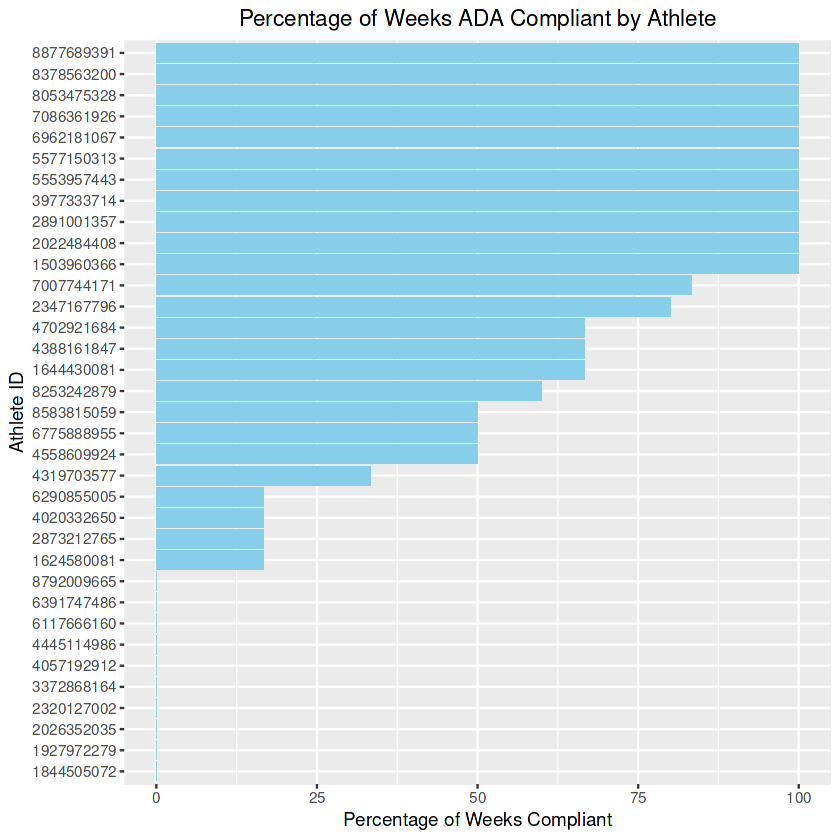

In [33]:
compliance_summary <- weekly_data %>%
  group_by(Id) %>%
  summarise(compliance_rate = mean(ada_compliant) * 100)
ggplot(compliance_summary, aes(x = reorder(as.character(Id), compliance_rate), y = compliance_rate)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +
  labs(x = "Athlete ID",
       y = "Percentage of Weeks Compliant") +
  ggtitle("Percentage of Weeks ADA Compliant by Athlete") +
  theme (plot.title= element_text(hjust = 0.5))
 ggsave(file = "Percentage of Weeks ADA Compliant by Athlete.png", dpi = 600, width = 8, height = 6, units = "in")

This visual shows the percentage of athletes that met the ADA guidelines.   Less that a third of the athletes were 100% compliant across the weeks studied.

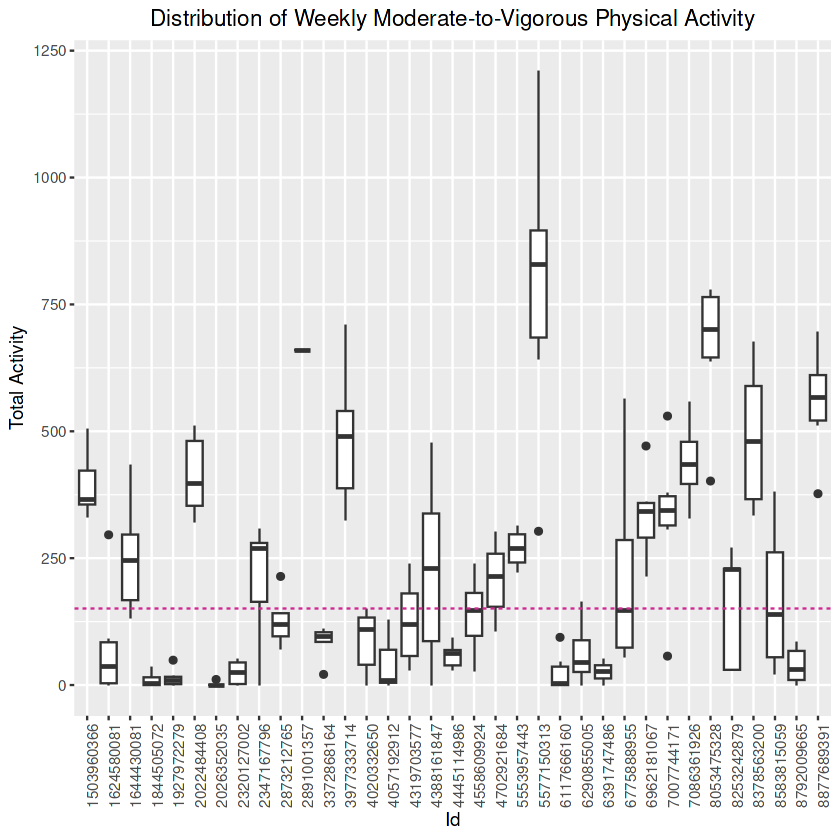

In [34]:
ggplot(weekly_data, aes(x = as.factor(Id), y = total_mvpa_minutes)) +
  geom_boxplot() +
  geom_hline(yintercept = 150, linetype = "dashed", color = "maroon3") +
  labs(x = "Id",
       y = "Total Activity") +
  ggtitle("Distribution of Weekly Moderate-to-Vigorous Physical Activity") +
  theme(axis.text.x=element_text(angle = 90), plot.title= element_text(hjust = 0.5))
   ggsave(file = "Distribution of Weekly Moderate-to-Vigorous Physical Activity.png", dpi = 600, width = 8, height = 6, units = "in")

This visual shows each athlete's average and spread of Moderate-to-Vigorous Physical activity across the weeks relative to the AHA target.

Warning message:
“Removed 21 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 21 rows containing missing values or values outside the scale range
(`geom_point()`).”


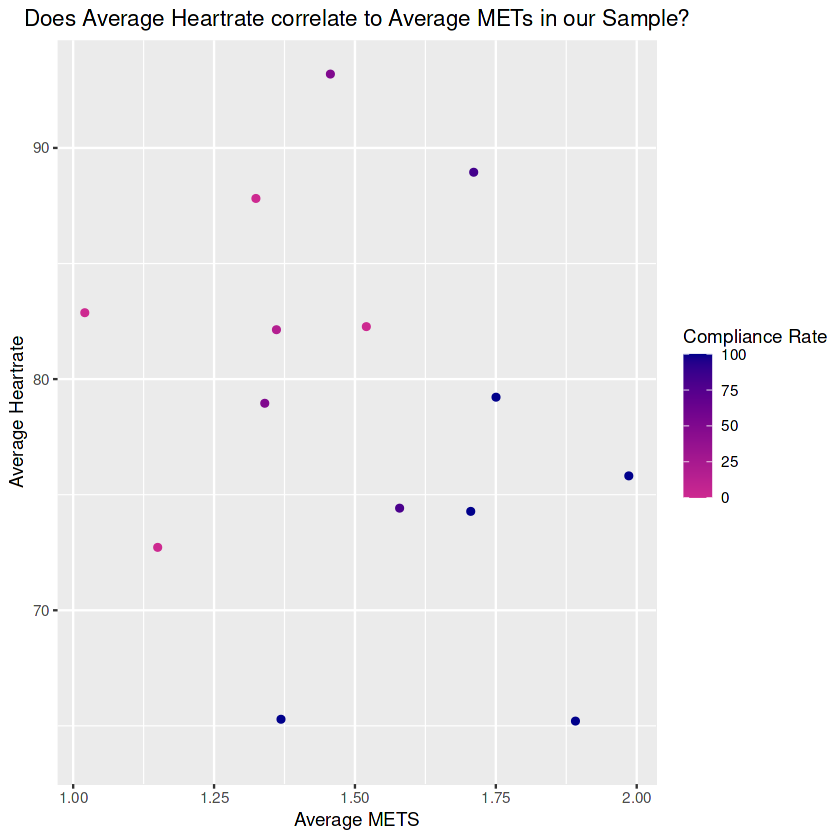

In [35]:
average_data <- minuteStats %>%
  group_by(Id) %>%
  summarise(
  average_heartrate = mean(avgMinuteHeartRate, na.rm=TRUE), 
  average_mets = mean(METs, na.rm=TRUE)/10, 
  average_cals = mean(Calories, na.rm=TRUE)
  )

compliance_summary_join <- left_join(compliance_summary, average_data, by = "Id")

ggplot(compliance_summary_join, aes(x = average_mets, y = average_heartrate, color = compliance_rate)) +
  geom_point() +
  labs(title = "Average Heartrate vs Average METS", x = "Average METS", y = "Average Heartrate", color = "Compliance Rate") +
  scale_color_gradient(low="maroon3", high="blue4") +
  ggtitle("Does Average Heartrate correlate to Average METs in our Sample?") +
  theme(plot.title= element_text(hjust = 0.5))
 ggsave(file = "Does Heartrate correlate to METs in our Sample.png", dpi = 600, width = 8, height = 6, units = "in")

This visual allows you to see if there is a correlation between heart rate, METs and compliance for the 14 people that tracked both Mets and heartrate.  (note the warning from the plotting tool that 21 athletes were not included because they lacked either heartrate info or METs info).  The correlation is not clear because of the very small population (14) but we should be seeing a correlation of higher heart rates to higher METs.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


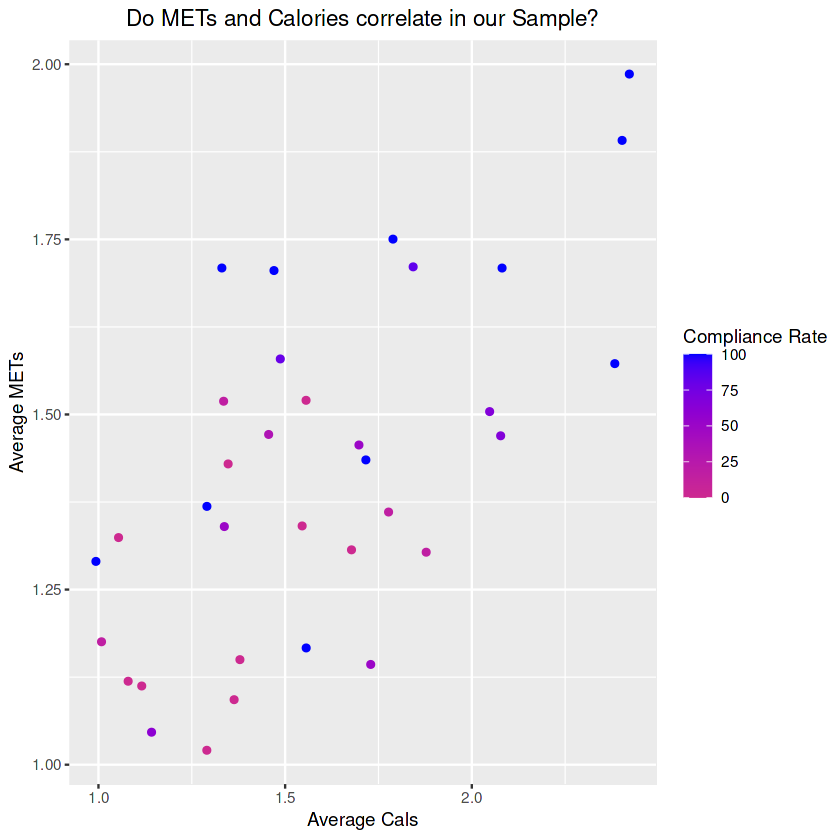

In [36]:
ggplot(compliance_summary_join, aes(x = average_cals, y = average_mets, color = compliance_rate)) +
  geom_point() +
  labs(x = "Average Cals", y = "Average METs", color = "Compliance Rate") +
  scale_color_gradient(low="maroon3", high="blue") +
  ggtitle("Do METs and Calories correlate in our Sample?") +
  theme(plot.title= element_text(hjust = 0.5))
  ggsave(file = "Do METs and Calories correlate in our Sample.png", dpi = 600, width = 8, height = 6, units = "in")


This visual allows you to see if there is a correlation between METs, calories and compliance for the 34 people that tracked both calories and METs.  (note the warning from the plotting tool that 1 athlete was not included because they lacked either calorie or METs info).  But you are able to see some correlation in increased calories aligning with increased METs.

Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_point()`).”


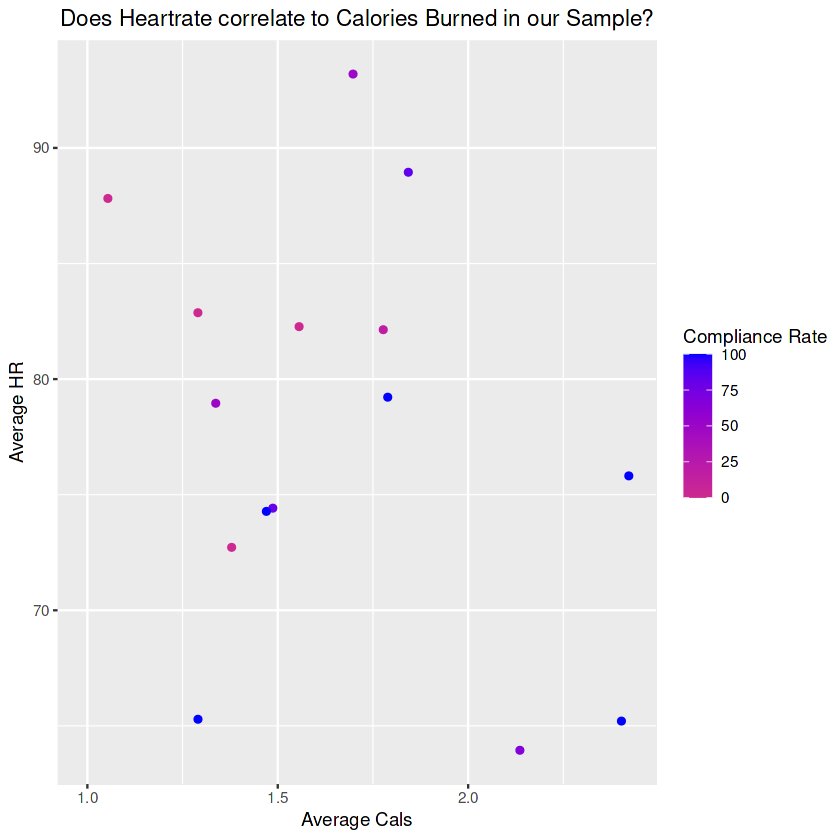

In [37]:
ggplot(compliance_summary_join, aes(x = average_cals, y = average_heartrate, color = compliance_rate)) +
  geom_point() +
  labs( x = "Average Cals", y = "Average HR", color = "Compliance Rate") +
  scale_color_gradient(low="maroon3", high="blue") +
  ggtitle("Does Heartrate correlate to Calories Burned in our Sample?") +
  theme(plot.title= element_text(hjust = 0.5))
  ggsave(file = "Does Heartrate correlate to Calories Burned in our Sample.png", dpi = 600, width = 8, height = 6, units = "in")

This visual allows you to see if there is a correlation between heartrate and calories and compliance for the 15 people that tracked both calories and heartrate.  (note the warning from the plotting tool that 1 athlete was not included because they lacked either calorie or heartrate info).  But you are able to see some correlation in increased calories aligning with increased heartrate.

## Conclusion and Recommendation
It may be surprising to see only a third of fitbit users are actually making the exercise targets deemed necessary to live a healthy lifestyle by the American Heart Association.  I would consider fitbit users more conscious of the need for movement so the number could actually be lower across the non-fitbit population.

I believe it would be most beneficial to understand why people are not meeting guidelines (both fitbit users and general population).   Is it lack of motivation, perceived barriers, insufficient knowledge?  Polling people to understand what's holding them back despite AHA guidelines could identify key marketing messages for tracking exercise.    

Some ideas on roadblocks - 

 * do non-fitbit users know how much exercise they're currently getting to even determine how they do against ADA targets?   BellaBeat tools are a great way to start!
 
 * do people feel it's too hard to meet targets?  Does BellaBeat need to communicate the AHA targets aim to improve well-being and aren't about elite fitness?
 
 * can BellaBeat leverage the scientific studies completed by the ADA to point out the value of healthy longevity?
 
 * can BellaBeat show, using their tools, a real return on investment between working toward ADA targets the athlete's metrics of improved sleep, increased energy, weight loss.
 
Polling needs to be completed to identify roadblocks for people.   
A/B tests need to be conducted to see how different messages for handling of these roadblocks, as well as incentives, are received by potential customers.  

By shifting the focus from intense fitness to accessible well-being, addressing perceived barriers, and providing targeted support, BellaBeat can reach the majority of users who are not currently meeting ADA guidelines as a target audience for their offerings.


